In [119]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

In [120]:
data = pd.read_csv("webcam_test_2017-09-30-12-26-14.csv")

In [121]:
data

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.042,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.083,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.125,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.167,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0,0.208,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,0.250,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,0.292,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0,0.333,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0,0.375,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
new_data = data[data[' confidence'] > .70] 

In [136]:
removed_data = data[data[' confidence'] <= .70] 

In [137]:
labels =  pd.read_csv("annos_s17_2017-09-30_3.csv")

In [138]:
#align the data
aligned_labels = []



#labels.drop(removed_data["frame"])
newFrames = []
for index, row in removed_data.iterrows():
    newFrames.append(int(row["frame"]) - 1)
labels = labels.drop(newFrames)


In [139]:
labels

,Timestamp,C_Gaze,Env,C_Movement,Unnamed: 4
12,0.500000,away,people,active,NaN
13,0.541667,away,people,active,NaN
32,1.333333,away,people,active,NaN
44,1.833333,away,people,active,NaN
45,1.875000,away,people,active,NaN
46,1.916667,away,people,active,NaN
47,1.958333,away,people,active,NaN
48,2.000000,away,people,active,NaN
49,2.041667,away,people,active,NaN
50,2.083333,away,people,active,NaN


In [140]:
new_data = new_data[:-4]

In [141]:
new_data

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
12,13,0,0.500,0.88,1,0.490115,0.518060,-0.701000,-0.110569,0.437534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,14,0,0.542,0.98,1,0.502741,0.604145,-0.618272,0.192178,0.474315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,33,0,1.333,0.77,1,0.217933,0.445631,-0.868285,-0.057812,0.164489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,45,0,1.833,0.73,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
45,46,0,1.875,0.88,1,0.001631,0.571123,-0.820863,-0.251735,0.323956,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
46,47,0,1.917,0.82,1,0.051677,0.687563,-0.724284,-0.138799,0.465378,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
47,48,0,1.958,0.88,1,0.150175,0.813878,-0.561293,-0.143064,0.347823,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48,49,0,2.000,0.93,1,0.078123,0.826184,-0.557958,-0.227640,0.478376,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
49,50,0,2.042,0.98,1,-0.012497,0.812299,-0.583107,-0.328687,0.521661,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50,51,0,2.083,0.98,1,-0.009666,0.813891,-0.580937,-0.326907,0.572618,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [142]:
labels = labels["C_Gaze"]

In [143]:
label_bools = []
for i in range(len(labels)):
    if labels.values[i] == "away":
        label_bools.append(False)
    else: 
        label_bools.append(True)


In [144]:
from collections import Counter
c = Counter( label_bools )

print( c.items() )

[(False, 784), (True, 5353)]


In [145]:
#new_data is data
#labels is annotations

new_data_test = new_data[5261:]
new_data_train = new_data[:5260]

#trains vanilla log reg with unmodified data using l2 regularization
labels_test = label_bools[5261:]
labels_train = label_bools[:5260]
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train, labels_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [146]:
#uses model to predict on test data
y_pred = LogReg.predict(new_data_test)

In [147]:
#evaluates results
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[ 66,  48],
       [ 64, 698]])

In [23]:
#shortens the data to only take leftmost n features
new_data_train_short = new_data_train.iloc[:,0:160]
new_data_test_short = new_data_test.iloc[:,0:160]
#uses fewer featured data to train log reg
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train_short, labels_train)

y_pred = LogReg.predict(new_data_test_short)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[ 74,  40],
       [ 50, 712]])

In [18]:
#fits svm to data
from sklearn import svm
clf = svm.SVC(gamma=0.00000000001, C=.1, tol=.00001)
clf.fit(new_data_train_short, labels_train)  

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-11, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-05, verbose=False)

In [19]:
#evaluates svm
y_pred = clf.predict(new_data_test_short)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[  0, 114],
       [  0, 762]])

In [20]:
#reduces data dimensionality
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=200)
new_data_train_pca = pca.fit_transform(StandardScaler().fit_transform(new_data_train))
new_data_test_pca = pca.fit_transform(StandardScaler().fit_transform(new_data_test))

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
#runs log reg on pca dimensionaity reduced data
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001)

LogReg.fit(new_data_train_pca, labels_train)

y_pred = LogReg.predict(new_data_test_pca)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[ 50,  64],
       [168, 594]])

In [22]:
#grabs data to graph
#note: pca needs to reduce to 2 for this to work
test_pd = pd.DataFrame(data=labels_train)
test_pd2 = pd.DataFrame(data=new_data_train_pca)
graph_data = pd.concat([test_pd2, test_pd], axis = 1)
graph_data.columns = ['principal component 1', 'principal component 2', 'label']


ValueError: Length mismatch: Expected axis has 201 elements, new values have 3 elements

In [ ]:
#graphs pca data

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('OpenFace Visualization', fontsize = 20)
targets = ['OpenFace']
ax.scatter(new_data_train_pca[:,0] , new_data_train_pca[:,1] , c = 'r' , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [ ]:
#graphs pca data with colors for true and false, true on top
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [False, True]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data['label'] == target
    ax.scatter(graph_data.loc[indicesToKeep, 'principal component 1']
               , graph_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#graphs pca data with colors for true and false, false on top
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data['label'] == target
    ax.scatter(graph_data.loc[indicesToKeep, 'principal component 1']
               , graph_data.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#trys svm with pca data
from sklearn import svm
clf = svm.SVC(gamma=1)
clf.fit(new_data_train_pca, labels_train)  

In [ ]:
#evaluates svm with pca data
y_pred = clf.predict(new_data_test_pca)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

In [ ]:
#selects k most significant features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

new_data_train_feature_selection = SelectKBest(f_classif, k=80).fit_transform(new_data_train, labels_train)
new_data_test_feature_selection = SelectKBest(f_classif, k=80).fit_transform(new_data_test, labels_test)

In [ ]:
#trains log reg with k most significant features
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train_feature_selection, labels_train)

y_pred = LogReg.predict(new_data_test_feature_selection)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

In [112]:
#creates a kernel pca with gamma g and n components
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=10, n_components=4)
kpca.fit(new_data_train)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=10, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=4, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)

In [113]:
new_data_train_kpca = kpca.transform(new_data_train)


In [114]:
kpca2 = KernelPCA(kernel="rbf", gamma=20, n_components=4)
kpca2.fit(new_data_test)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=20, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=4, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)

In [115]:
new_data_test_kpca = kpca2.transform(new_data_test)

In [25]:
#sets up kernel pca data to be graphed
test_pd = pd.DataFrame(data=labels_train)
test_pd2 = pd.DataFrame(data=new_data_train_kpca)
graph_data2 = pd.concat([test_pd2, test_pd], axis = 1)
graph_data2.columns = ['principal component 1', 'principal component 2', 'label']

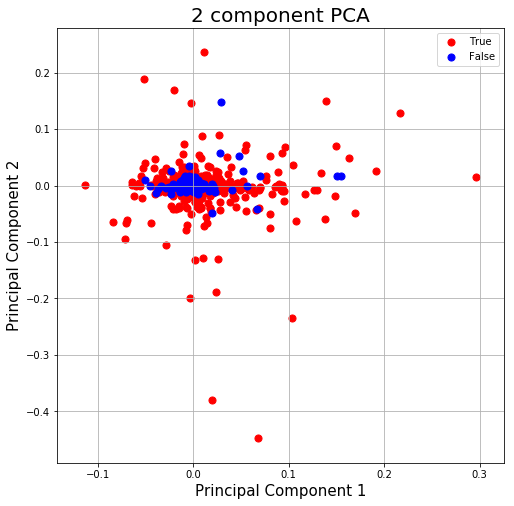

In [28]:
#graphs kernel pca data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = graph_data2['label'] == target
    ax.scatter(graph_data2.loc[indicesToKeep, 'principal component 1']
               , graph_data2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [79]:
#fits svm to kpca data
from sklearn import svm
clf = svm.SVC(gamma='scale', tol=.00001)
clf.fit(new_data_train_kpca, labels_train) 

[LibSVM]

SVC(C=1.0, cache_size=10000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-05, verbose=True)

In [80]:
#evaluates kernel pca data svm
y_pred = clf.predict(new_data_test_kpca)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[  0, 114],
       [  0, 762]])

In [116]:
#trains log reg with kernel pca data
LogReg = LogisticRegression(max_iter=10000, penalty='l2', tol=.0001, class_weight="balanced")

LogReg.fit(new_data_train_kpca, labels_train)





LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [117]:
y_pred = LogReg.predict(new_data_test_kpca)

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels_test, y_pred)
confusion_matrix

array([[ 63,  51],
       [412, 350]])